<a href="https://colab.research.google.com/github/kayodeolusanya/Nexus-Bank-Customer-Segmentation-Project/blob/main/Nexus_Bank_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load dataset
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploratory Data Analysis

In [6]:
df.shape

(45211, 17)

Our Dataset has 45,211 rows and 17 features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Statistical Analysis of the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<Axes: >

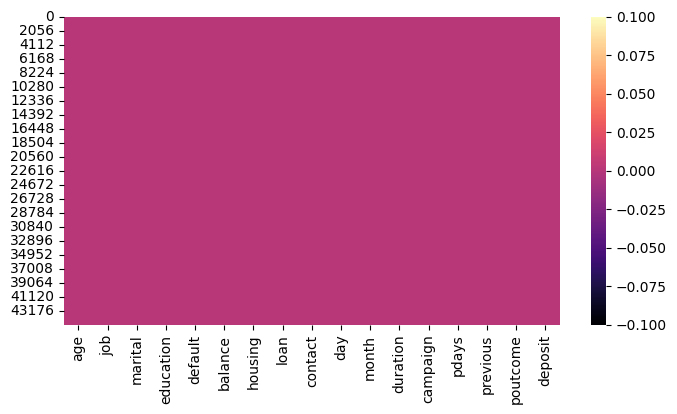

In [9]:
# Check for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull(), cbar= True, cmap= "magma")

From the graph, we can see that we dont have any missing data in our dataset.

In [10]:
# Checking for duplicated rows in the dataset
df.duplicated().sum()

0

#### Univariate Analysis

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

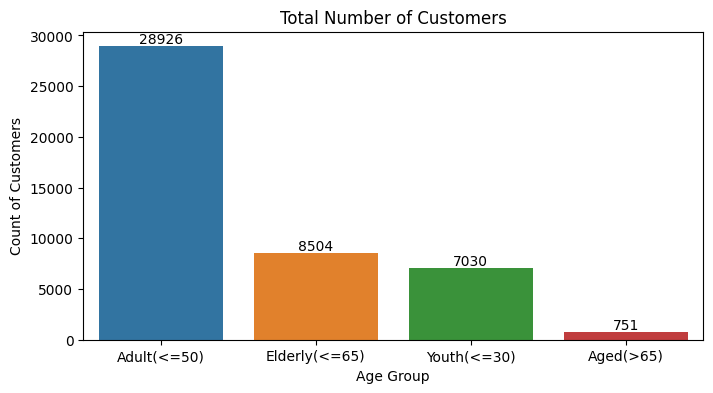

In [12]:
# Investigating the Age group of our customers

# Create an Age bracket column
def age_bracket(age):
  if age <= 30:
    return "Youth(<=30)"
  elif age <= 50:
    return "Adult(<=50)"
  elif age <= 65:
    return "Elderly(<=65)"
  else:
    return "Aged(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)
plt.figure(figsize= (8,4))
ag = sns.countplot(x=df['age_bracket'], data=df, order=df['age_bracket'].value_counts(ascending=False).index)
values = df['age_bracket'].value_counts(ascending=False).values
ag.bar_label(container=ag.containers[0], labels=values)
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')
plt.title('Total Number of Customers');

The above graph counts the total number of customers we have 45,211. Adults age group has the highest with 28,926 customers followed by Elderly at 8,504 customers, Youth group at 7,030 customers and Aged group at 751 customers.

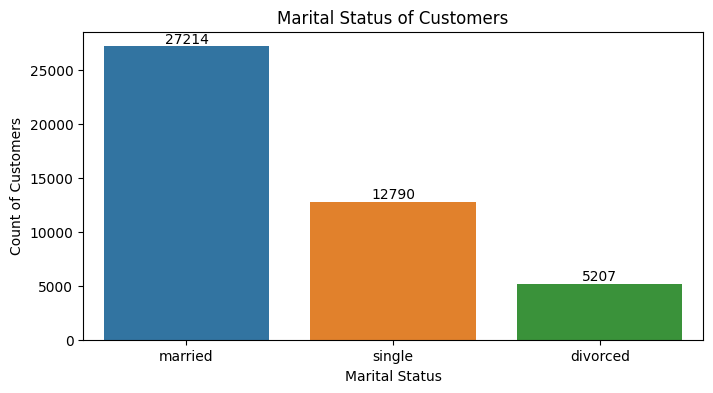

In [13]:
# Investigating the Marital Status of our customers
plt.figure(figsize= (8,4))
m = sns.countplot(x='marital', data=df)
values = df['marital'].value_counts(ascending=False).values
m.bar_label(container=m.containers[0], labels=values)
plt.xlabel('Marital Status')
plt.ylabel('Count of Customers')
plt.title('Marital Status of Customers');

From the graph, 27,214 customers are married which amounts to 60% of the total customers. The singles closely follows with 12,790 and Divorced group at 5,207.

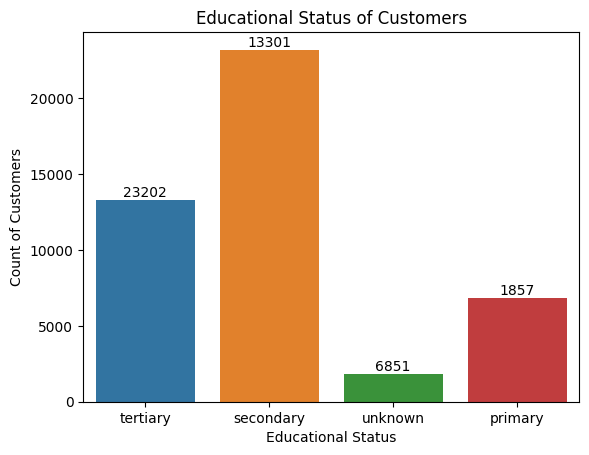

In [14]:
# Investigating the Educational Status of our customers
ed = sns.countplot(x='education', data=df)
values = df['education'].value_counts(ascending=False).values
ed.bar_label(container=ed.containers[0], labels=values);
plt.xlabel('Educational Status')
plt.ylabel('Count of Customers')
plt.title('Educational Status of Customers');

From the graph, 36,503 customers either have a secondary or tertiary education(80%)

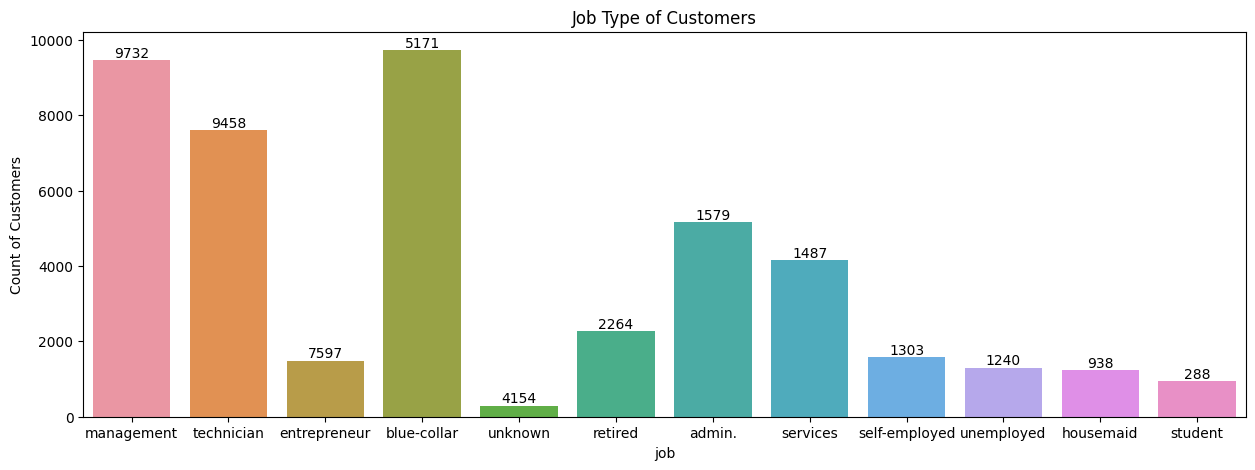

In [15]:
# Investigating the Job of our customers
plt.figure(figsize= (15,5))
jt = sns.countplot(x='job', data=df)
values = df['job'].value_counts(ascending=False).values
jt.bar_label(container=jt.containers[0], labels=values);
plt.ylabel('Count of Customers')
plt.title('Job Type of Customers');

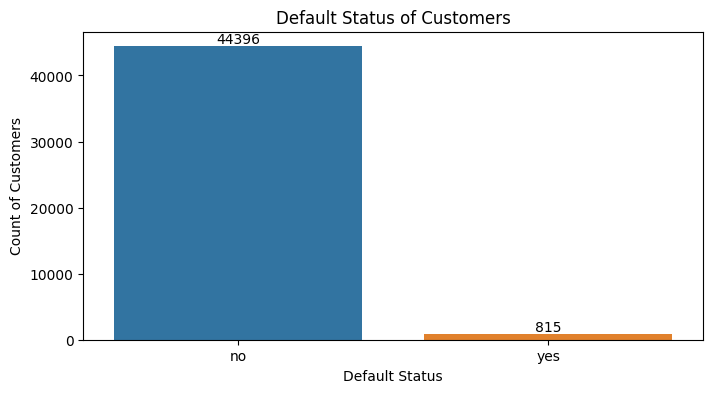

In [16]:
# Investigating the Default Status of our customers
plt.figure(figsize= (8,4))
ds = sns.countplot(x='default', data=df)
values = df['default'].value_counts(ascending=False).values
ds.bar_label(container=ds.containers[0], labels=values);
plt.xlabel('Default Status')
plt.ylabel('Count of Customers')
plt.title('Default Status of Customers');


Only 815 customers have defaulted on there loan from the total customer base.

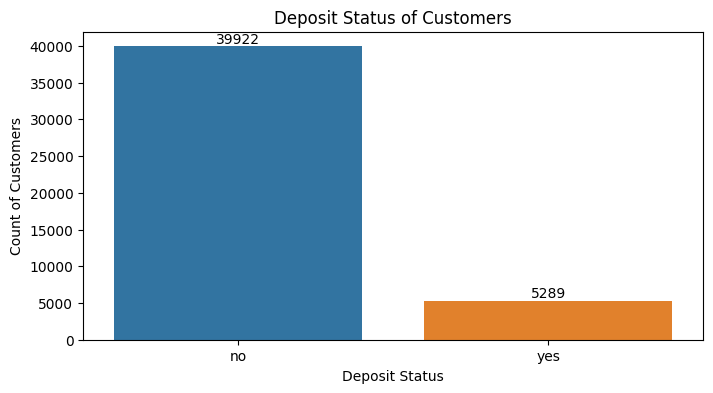

In [17]:
# Investigating the Deposit Status of our customers
plt.figure(figsize= (8,4))
dep = sns.countplot(x='deposit', data=df)
values = df['deposit'].value_counts(ascending=False).values
dep.bar_label(container=dep.containers[0], labels=values);
plt.xlabel('Deposit Status')
plt.ylabel('Count of Customers')
plt.title('Deposit Status of Customers');

From the graph, 39,922 customers do not have a deposit with the bank. Only 5,289 customers currently have a dposit in the bank.

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


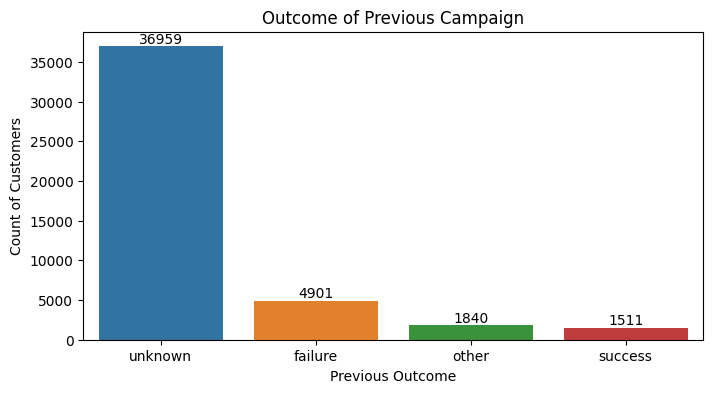

In [18]:
# Investigating the Previous Outcome of the last campaign.
plt.figure(figsize= (8,4))
pc = sns.countplot(x='poutcome', data=df )
values = df['poutcome'].value_counts(ascending=False).values
pc.bar_label(container=pc.containers[0], labels=values)
plt.xlabel('Previous Outcome')
plt.ylabel('Count of Customers')
plt.title('Outcome of Previous Campaign');
print(df['poutcome'].value_counts())

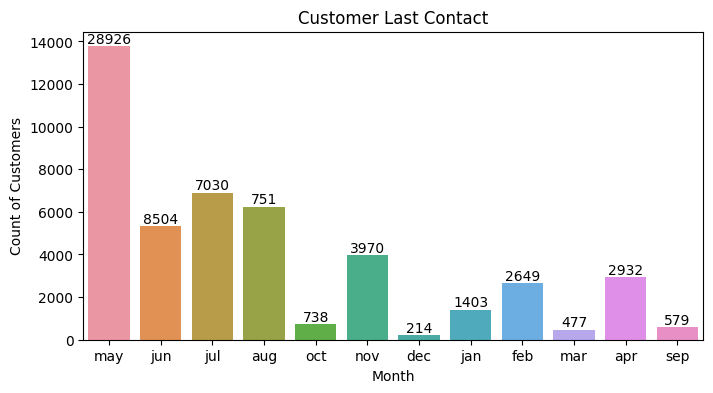

In [19]:
# Investigating the Last Month our customer was contacted
plt.figure(figsize= (8,4))
lc = sns.countplot(x='month', data=df)
values = df['age_bracket'].value_counts(ascending=False).values
lc.bar_label(container=lc.containers[0], labels=values);
plt.xlabel('Month')
plt.ylabel('Count of Customers')
plt.title('Customer Last Contact');


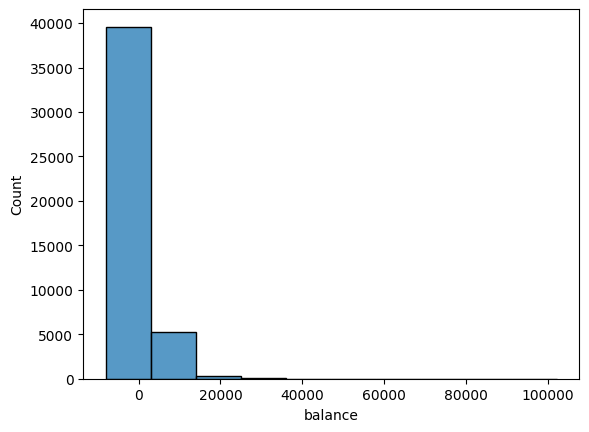

In [20]:
# Investigating the Balances of our customers
sns.histplot(x=df["balance"], bins=10);

#### Multivariate Analysis

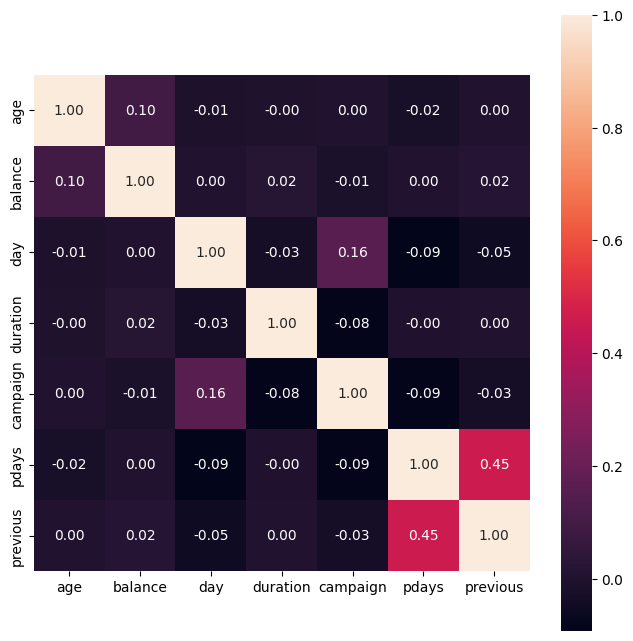

In [21]:
#  Correlation between variables in the dataset
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10});

In [22]:
ml_df = df
ml_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Elderly(<=65)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adult(<=50)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult(<=50)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adult(<=50)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult(<=50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Elderly(<=65)
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Aged(>65)
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Aged(>65)
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Elderly(<=65)


#### Feature Engineering

In [23]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() #method initialization

#Looping for columns except Survived
for c in df.columns[1:]:
  if(df[c].dtype=='object'):
    df[c] = encoder.fit_transform(df[c])
  else:
    df[c] = df[c]

ml_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,2
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0


In [24]:
# Normalizing the data
scaler = MinMaxScaler()

ml_df['scaled_balance'] = scaler.fit_transform(ml_df['balance'].values.reshape(-1,1))
ml_df["Scaled_duration"] = scaler.fit_transform(ml_df['duration'].values.reshape(-1,1))
ml_df["Scaled_pdays"] = scaler.fit_transform(ml_df['pdays'].values.reshape(-1,1))

#Dropping features we dont need
ml_df.drop('balance', axis=1, inplace=True)
ml_df.drop('duration', axis=1, inplace=True)
ml_df.drop('pdays', axis=1, inplace=True)
ml_df.drop('age_bracket', axis=1, inplace=True)
ml_df.drop('contact', axis=1, inplace=True)
ml_df
     

,age,job,marital,education,default,housing,loan,day,month,campaign,previous,poutcome,deposit,scaled_balance,Scaled_duration,Scaled_pdays
0,58,4,1,2,0,1,0,5,8,1,0,3,0,0.092259,0.053070,0.000000
1,44,9,2,1,0,1,0,5,8,1,0,3,0,0.073067,0.030704,0.000000
2,33,2,1,1,0,1,1,5,8,1,0,3,0,0.072822,0.015453,0.000000
3,47,1,1,3,0,1,0,5,8,1,0,3,0,0.086476,0.018707,0.000000
4,33,11,2,3,0,0,0,5,8,1,0,3,0,0.072812,0.040260,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0,0,17,9,3,0,3,1,0.080293,0.198658,0.000000
45207,71,5,0,0,0,0,0,17,9,2,0,3,1,0.088501,0.092721,0.000000
45208,72,5,1,1,0,0,0,17,9,5,3,2,1,0.124689,0.229158,0.212156
45209,57,1,1,1,0,0,0,17,9,4,0,3,0,0.078868,0.103294,0.000000


###Dimensionality Reduction

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(ml_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,17.215499,-10.585549
1,3.171241,-10.792670
2,-7.747079,-11.066078
3,6.237110,-10.816697
4,-7.843393,-10.967489
...,...,...
45206,9.959546,1.440528
45207,30.014507,1.692543
45208,30.986490,1.863014
45209,16.023320,1.535812


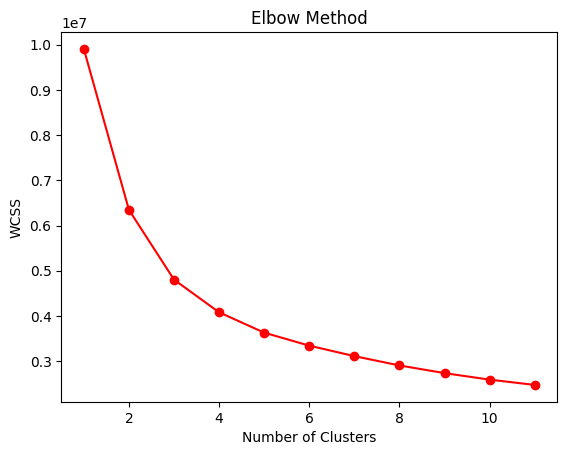

In [26]:
# Determining the numbers of clusters using the Elbow Method
wcss = []
for i in range(1,12):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(ml_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,12), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the plotted graph, 3 clusters is the optimal number of clusters.

In [27]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(ml_df)
pca_df_kmeans= pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})], axis=1)

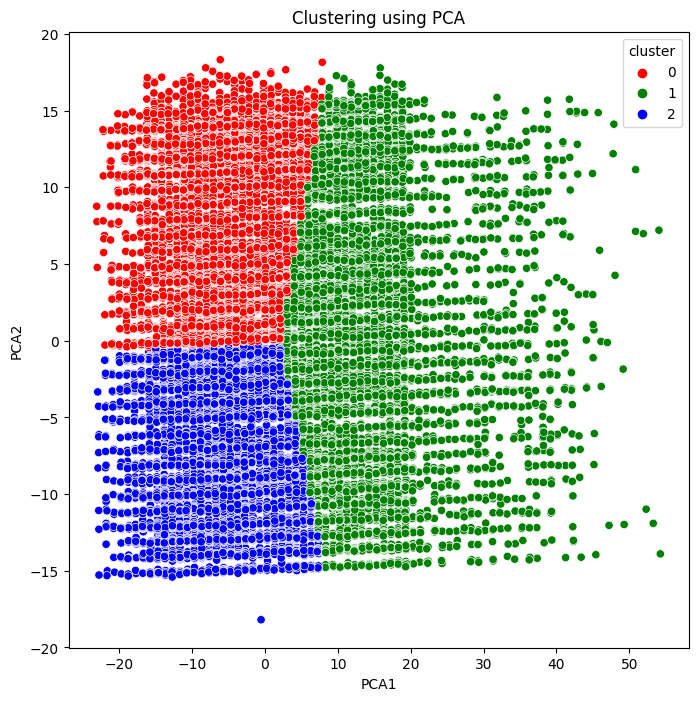

In [28]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df_kmeans, palette=['red','green','blue','black'])
plt.title('Clustering using PCA')
plt.show()

In [29]:
# Creating a target column 'Cluster' for storing the cluster segment
cluster_df = pd.concat([ml_df, pd.DataFrame({'cluster':kmeans_model.labels_})], axis=1)
cluster_df

,age,job,marital,education,default,housing,loan,day,month,campaign,previous,poutcome,deposit,scaled_balance,Scaled_duration,Scaled_pdays,cluster
0,58,4,1,2,0,1,0,5,8,1,0,3,0,0.092259,0.053070,0.000000,1
1,44,9,2,1,0,1,0,5,8,1,0,3,0,0.073067,0.030704,0.000000,2
2,33,2,1,1,0,1,1,5,8,1,0,3,0,0.072822,0.015453,0.000000,2
3,47,1,1,3,0,1,0,5,8,1,0,3,0,0.086476,0.018707,0.000000,2
4,33,11,2,3,0,0,0,5,8,1,0,3,0,0.072812,0.040260,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0,0,17,9,3,0,3,1,0.080293,0.198658,0.000000,1
45207,71,5,0,0,0,0,0,17,9,2,0,3,1,0.088501,0.092721,0.000000,1
45208,72,5,1,1,0,0,0,17,9,5,3,2,1,0.124689,0.229158,0.212156,1
45209,57,1,1,1,0,0,0,17,9,4,0,3,0,0.078868,0.103294,0.000000,1


0    15955
2    14960
1    14296
Name: cluster, dtype: int64


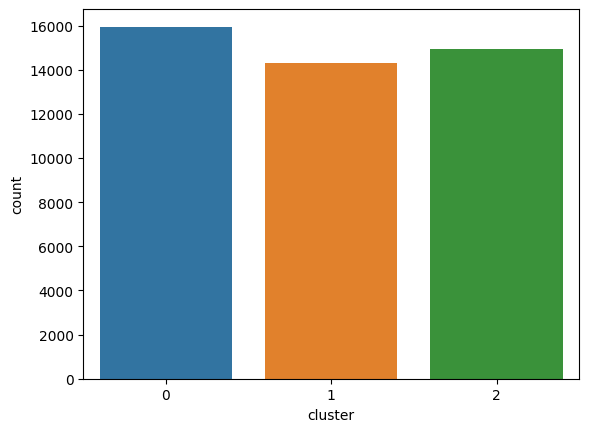

In [30]:
# Visualizing the count of Numbers in each cluster
sns.countplot(x='cluster', data=cluster_df);
print(cluster_df['cluster'].value_counts())

###Model Building using KMeans

### Machine Learning

In [60]:
# Create a scaler object
scaler = MinMaxScaler()
# Fit the scaler on the features
scaler.fit(ml_df)
# Transform the features to the scaled representation
ml_df1 = scaler.transform(ml_df)
scaled_df = pd.DataFrame(ml_df1, columns=ml_df.columns)
scaled_df

,age,job,marital,education,default,housing,loan,day,month,campaign,previous,poutcome,deposit,scaled_balance,Scaled_duration,Scaled_pdays
0,0.519481,0.363636,0.5,0.666667,0.0,1.0,0.0,0.133333,0.727273,0.000000,0.000000,1.000000,0.0,0.092259,0.053070,0.000000
1,0.337662,0.818182,1.0,0.333333,0.0,1.0,0.0,0.133333,0.727273,0.000000,0.000000,1.000000,0.0,0.073067,0.030704,0.000000
2,0.194805,0.181818,0.5,0.333333,0.0,1.0,1.0,0.133333,0.727273,0.000000,0.000000,1.000000,0.0,0.072822,0.015453,0.000000
3,0.376623,0.090909,0.5,1.000000,0.0,1.0,0.0,0.133333,0.727273,0.000000,0.000000,1.000000,0.0,0.086476,0.018707,0.000000
4,0.194805,1.000000,1.0,1.000000,0.0,0.0,0.0,0.133333,0.727273,0.000000,0.000000,1.000000,0.0,0.072812,0.040260,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.0,0.0,0.533333,0.818182,0.032258,0.000000,1.000000,1.0,0.080293,0.198658,0.000000
45207,0.688312,0.454545,0.0,0.000000,0.0,0.0,0.0,0.533333,0.818182,0.016129,0.000000,1.000000,1.0,0.088501,0.092721,0.000000
45208,0.701299,0.454545,0.5,0.333333,0.0,0.0,0.0,0.533333,0.818182,0.064516,0.010909,0.666667,1.0,0.124689,0.229158,0.212156
45209,0.506494,0.090909,0.5,0.333333,0.0,0.0,0.0,0.533333,0.818182,0.048387,0.000000,1.000000,0.0,0.078868,0.103294,0.000000


In [78]:
scaled_df1 = scaled_df.drop(['deposit'], axis=1)
label = scaled_df['deposit']

In [79]:
# Spliting the dataset into trainning and testing sets

x_train, X_test, y_train,y_test = train_test_split(scaled_df1, label, test_size=0.2,random_state=453)

In [83]:
Classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(),'K-Nearest Neighbours'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42),'DecisionTree']
               ]

In [84]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in Classifiers:
  model = classifier[0]
  model.fit(x_train, y_train)
  model_name = classifier[1]

  pred = model.predict(X_test)

  a_score = accuracy_score(y_test, pred)
  p_score = precision_score(y_test, pred)
  r_score = recall_score(y_test, pred)
  roc_score = roc_auc_score(y_test, pred)

  acc_list[model_name] = ([str(round(a_score*100, 2))+'%'])
  precision_list[model_name] = ([str(round(p_score*100, 2))+'%'])
  recall_list[model_name] = ([str(round(r_score*100, 2))+'%'])
  roc_list[model_name] = ([str(round(roc_score*100, 2))+'%'])

  if model_name != Classifiers[-1][1]:
    print('')

In [85]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,DecisionTree
0,90.38%,90.53%,88.43%,84.83%,87.17%


In [86]:
print('Precision Score')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,DecisionTree
0,63.03%,66.99%,52.49%,37.72%,45.78%


In [88]:
print('Recall Score')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,DecisionTree
0,44.85%,39.14%,21.72%,43.73%,46.72%


In [89]:

print('AUC-ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

AUC-ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,DecisionTree
0,70.66%,68.28%,59.54%,67.03%,69.66%


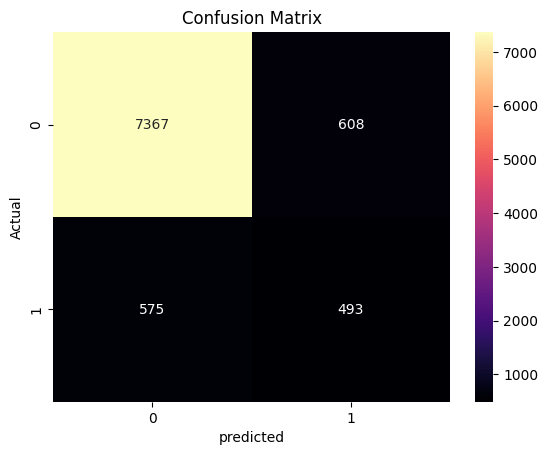

In [99]:

# Creating a confusion Matrix for Random Forest
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfy_pred = rfc.predict(X_test)

rcm = confusion_matrix(y_test, rfy_pred)

sns.heatmap(lcm, annot=True, cmap="magma", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show();

Since Random Forest Classifier has the highrést Accuracy of 90.53% and Precision of 66.99% of all the classifiers, I proceeded to go with the random forest . 